In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from src.utils import visualize_metrics_plots

# Reading the data
#data_742 = pd.read_csv("data_anno/crops_742.csv", sep=",", low_memory=True, nrows=5000) # Too large of a file xd, 9625 rows reduced to 5000
train_data = pd.read_csv("data_anno/training_data_crops.csv", sep=",")
test_data = pd.read_csv("data_anno/testing_data_crops.csv", sep=",")
#train_data = pd.read_csv("data_anno/training_data_coords.csv", sep=",")
#test_data = pd.read_csv("data_anno/testing_data_coords.csv", sep=",")

#features = data_741[data_741.columns[:-1]] # Lets not assign variables to the data, too much memory usage
#labels = data_741[data_741.columns[-1]]

# Stratified splitting for train and test
# Stratified means that it maintains similar distributions of classes for both train and test
#X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42, stratify=labels) # Original
#X_train, X_test, y_train, y_test = train_test_split(data_741[data_741.columns[:-1]], data_741[data_741.columns[-1]], test_size=0.33, random_state=42, stratify=data_741[data_741.columns[-1]])

#train_data[train_data.columns[:-1]], train_data[train_data.columns[-1]]
# Oversampling
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(train_data[train_data.columns[:-1]], train_data[train_data.columns[-1]])

# Testing different parameters:
    Estimators = 1000
    seed = 0
    Depth = 5, 10, None
    Resampling_Strategy = "all", "auto" (similar to not minority)
    and balanced RFC on SMOTE dataset

# Training on crops

Confusion Matrix of Test Classification
Trained on image crops
Accuracy: 0.8278923253150057 
Precision: 0.4080311901025658 
Recall: 0.27811291424915574 
F1 Score: 0.3015687486525324 
Labels:
0: ['human-hold-bicycle']
1: ['human-hold-motorcycle']
2: ['human-ride-bicycle']
3: ['human-ride-motorcycle']
4: ['human-walk-bicycle']
5: ['human-walk-motorcycle']

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.17      0.28       183
           1       0.00      0.00      0.00         2
           2       0.87      0.95      0.91      2959
           3       0.24      0.09      0.13       196
           4       0.20      0.18      0.19       152

    accuracy                           0.83      3492
   macro avg       0.41      0.28      0.30      3492
weighted avg       0.80      0.83      0.80      3492



<Figure size 640x480 with 0 Axes>

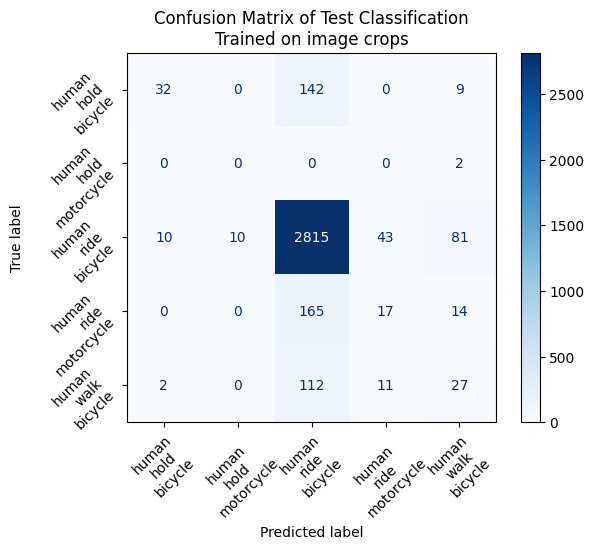

<Figure size 640x480 with 0 Axes>

In [2]:
# Training both balanced and unbalanced datasets with a stratifying random forest
ests = 1000
seed = 0
depths = [None]
#strats = ["all", "auto"]
"""
for i in range(3):
    clf_unbalanced = RandomForestClassifier(max_depth=depth[i], random_state=seed, n_estimators=ests, n_jobs=-1)
    clf_unbalanced.fit(X_train, y_train)
    params = f"Unbalanced dataset {i}\ndepth = {depth[i]}"
    print(f"======================================================")
    print(params)
    visualize_metrics(clf_unbalanced, X_test, y_test, params,f"Unbalanced dataset {i}")
    print(f"======================================================")

for i in range(3):
    for j in range(2):
        clf_semibalanced = BalancedRandomForestClassifier(
            sampling_strategy=strat[j],
            replacement=True,
            max_depth=depth[i],
            random_state=seed,
            n_estimators=ests,
            n_jobs=-1,
        )
        clf_semibalanced.fit(X_train, y_train)
        params = f"Semi-balanced dataset {i}-{strat[j]}\ndepth = {depth[i]}\nresampling_strategy = {strat[j]}"
        print(f"======================================================")
        print(params)
        visualize_metrics(clf_semibalanced, X_test, y_test, params, f"Semi-balanced dataset {depth[i]}-{strat[j]}")
        print(f"======================================================")
"""


clf_balanced = RandomForestClassifier(max_depth=None, random_state=seed, n_estimators=ests, n_jobs=-1)
clf_balanced.fit(X_res, y_res)
#clf_balanced.fit(train_data[train_data.columns[:-1]], train_data[train_data.columns[-1]])
#params = f"Balanced dataset\nTraining on crops\nDepth: None\nEstimators: {ests}"
params = f"Confusion Matrix of Test Classification\nTrained on image crops"
print(f"======================================================")
print(params)
visualize_metrics_plots(clf_balanced, test_data[test_data.columns[:-1]], test_data[test_data.columns[-1]],params,f"CROPS")
print(f"======================================================")

# Training on coordinates

Confusion Matrix of Test Classification
Trained on bbox coordinates
Accuracy: 0.6927262313860252 
Precision: 0.2162728775086511 
Recall: 0.24090464129588543 
F1 Score: 0.21950289355800937 
Labels:
0: ['human-hold-bicycle']
1: ['human-hold-motorcycle']
2: ['human-ride-bicycle']
3: ['human-ride-motorcycle']
4: ['human-walk-bicycle']
5: ['human-walk-motorcycle']

Classification Report:
               precision    recall  f1-score   support

           0       0.03      0.01      0.01       183
           1       0.00      0.00      0.00         2
           2       0.86      0.79      0.82      2959
           3       0.08      0.17      0.11       196
           4       0.11      0.24      0.15       152

    accuracy                           0.69      3492
   macro avg       0.22      0.24      0.22      3492
weighted avg       0.74      0.69      0.71      3492



<Figure size 640x480 with 0 Axes>

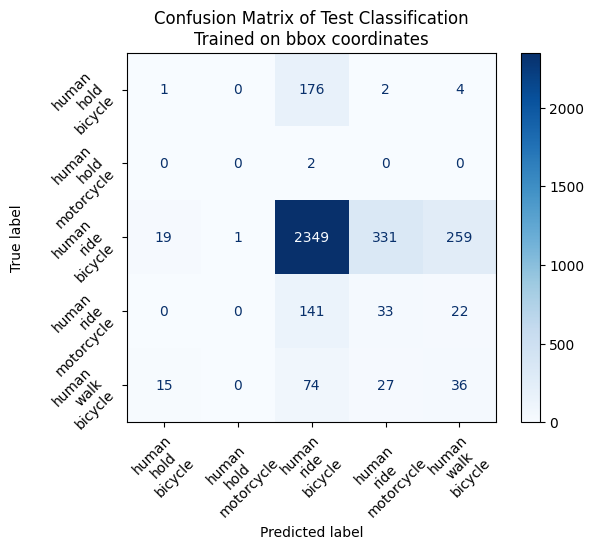

<Figure size 640x480 with 0 Axes>

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from src.utils import visualize_metrics_plots

train_data = pd.read_csv("data_anno/training_data_coords.csv", sep=",")
test_data = pd.read_csv("data_anno/testing_data_coords.csv", sep=",")

# Oversampling
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(train_data[train_data.columns[:-1]], train_data[train_data.columns[-1]])

ests = 1000
seed = 0

clf_balanced = RandomForestClassifier(max_depth=None, random_state=seed, n_estimators=ests, n_jobs=-1)
clf_balanced.fit(X_res, y_res)
#clf_balanced.fit(train_data[train_data.columns[:-1]], train_data[train_data.columns[-1]])
#params = f"Balanced dataset\nTraining on coordinates\nDepth: None\nEstimators: {ests}"
params = f"Confusion Matrix of Test Classification\nTrained on bbox coordinates"
print(f"======================================================")
print(params)
visualize_metrics_plots(clf_balanced, test_data[test_data.columns[:-1]], test_data[test_data.columns[-1]],params,f"COORDS")
print(f"======================================================")

In [4]:
# Run separately, runs out of memory lols, lowering data from 5000 rows to 4000
#ests = 1000
#seed = 0
#depths = [None]
#strats = ["all", "auto"]

#for i, depth in enumerate(depths):
#    for j, strat in enumerate(strats):
#        clf_doublebalanced = BalancedRandomForestClassifier(
#            sampling_strategy=strat,
#            replacement=True,
#            max_depth=depth,
#            random_state=seed,
#            n_estimators=ests,
#            n_jobs=-1,
#        )
#        clf_doublebalanced.fit(X_res, y_res)
#        params = f"Double-balanced dataset {i}-{strat}\ndepth = {depth}\nresampling_strategy = {strat}"
#        print(f"======================================================")
#        print(params)
#        visualize_metrics_plots(clf_doublebalanced, test_data[test_data.columns[:-1]], test_data[test_data.columns[-1]], params, f"Double-balanced dataset {depth}-{strat}")
#        print(f"======================================================")